#**Project : Disaster Tweet Analyzer: Natural Language Processing for Crisis Communication**

##**Introduction**

The "Disaster Tweet Analyzer" project leverages Natural Language Processing (NLP) to analyze tweets related to disasters, providing real-time insights to support crisis management. Social media, especially Twitter, plays a crucial role in disseminating information during emergencies, with users sharing updates and warnings. This project focuses on developing algorithms to identify key information like sentiment, urgency, and topics from large volumes of tweets. By analyzing these, the system enhances situational awareness and supports decision-making for disaster response teams. The project highlights the potential of NLP to improve crisis communication and ensure timely, accurate information reaches affected communities.

## Datasets


Dataset - 1 : https://www.kaggle.com/datasets/vstepanenko/disaster-tweets

Dataset - 2 : https://www.kaggle.com/c/nlp-getting-started/overview

## Data Exploration of Dataset - 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Disaster Tweets/tweets.csv')

In [3]:
df.shape

(11370, 5)

In [4]:
df.head(5)

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [5]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [6]:
df.dtypes

,0
id,int64
keyword,object
location,object
text,object
target,int64


In [7]:
df.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


In [8]:
df.nunique()

,0
id,11370
keyword,219
location,4504
text,11223
target,2


In [9]:
df.isna().sum()

,0
id,0
keyword,0
location,3418
text,0
target,0


In [10]:
df.loc[df.duplicated()]

,id,keyword,location,text,target


In [11]:
df.loc[df.duplicated(subset=['text'])].head(5)

,id,keyword,location,text,target
103,103,aftershock,"fresno, ca",thinking about how some1 spat blood at me duri...,0
292,292,annihilation,NaN,[AUS] Vic Bushfire Appeal | Doggos | Animal Fa...,0
771,771,bioterror,Planet Earth,The human cull (from 38mins30secs https://t.co...,0
787,787,bioterror,NaN,Does the push for mass vaccination point towar...,0
808,808,bioterror,United States,Does the push for vaccination point to a stage...,0


In [12]:
df['target'].value_counts()

,count
target,
0,9256
1,2114


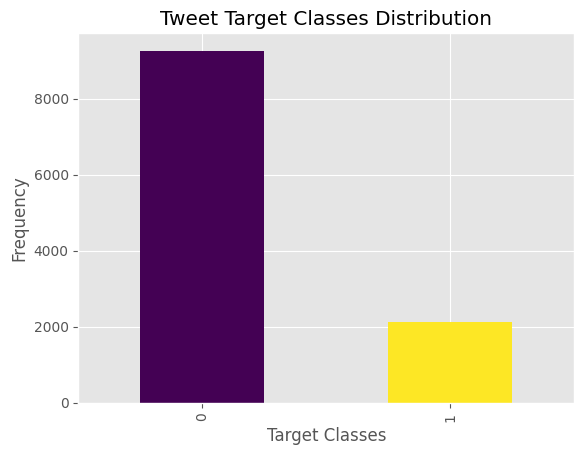

In [13]:
value_counts = df['target'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(value_counts)))
value_counts.plot(kind='bar', color=colors)

plt.xlabel('Target Classes')
plt.ylabel('Frequency')
plt.title('Tweet Target Classes Distribution')
plt.show()

<ipython-input-14-bee39a5b31bd>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10).colors


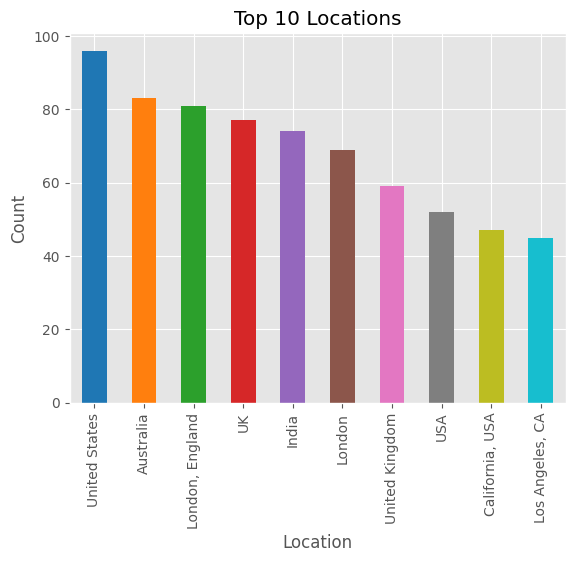

In [14]:
colors = plt.cm.get_cmap('tab10', 10).colors
ax = df['location'].value_counts() \
    .head(10) \
    .plot(kind='bar', color=colors, title='Top 10 Locations')

ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.show()

<ipython-input-15-ecf616ffb73e>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 10).colors


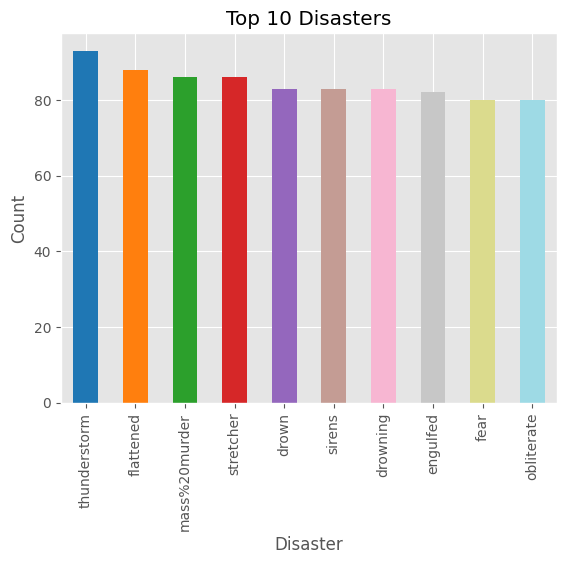

In [15]:
# Generate 10 different colors
colors = plt.cm.get_cmap('tab20', 10).colors

# Plot with each bar having a different color
ax = df['keyword'].value_counts() \
    .head(10) \
    .plot(kind='bar', color=colors, title='Top 10 Disasters')

# Set labels
ax.set_xlabel('Disaster')
ax.set_ylabel('Count')

# Show the plot
plt.show()

In [16]:
x = df['location'].value_counts().head(200).to_frame().T
x

location,United States,Australia,"London, England",UK,India,London,United Kingdom,USA,"California, USA","Los Angeles, CA","England, United Kingdom",Nigeria,"Lagos, Nigeria","Melbourne, Victoria",Earth,Ireland,Canada,"Mumbai, India","Nairobi, Kenya",South Africa,"Atlanta, GA","Texas, USA","New Delhi, India",Sydney,Philippines,"Chicago, IL",Worldwide,"Florida, USA","Sydney, New South Wales",Republic of the Philippines,"New York, USA",Malaysia,"Melbourne, Australia","New York, NY","Sydney, Australia","Moe's Tavern, Springfield",England,"Washington, DC","Pennsylvania, USA","Johannesburg, South Africa",Texas,Hong Kong,"Portland, OR","Perth, Western Australia","Bengaluru, India","San Francisco, CA",she/her,"South East, England","Toronto, Ontario","Manchester, England","North Carolina, USA",NYC,"Abuja, Nigeria","London, UK",Planet Earth,"Hyderabad, India",Singapore,"Accra, Ghana","Houston, TX",Ghana,"Seattle, WA","Scotland, United Kingdom","San Diego, CA","Georgia, USA","Cape Town, South Africa","Pretoria, South Africa",Global,Indonesia,"Las Vegas, NV",Kenya,Everywhere,Pakistan,Melbourne,"Belfast, Northern Ireland","Sioux Falls, SD","Bangkok, Thailand","Brisbane, Queensland",Edinburgh,"Dublin, Ireland",France,"Bristol, England",Nairobi,Scotland,Mumbai,"Paris, France","Queensland, Australia","Brisbane, Australia","Baltimore, MD",New York City,"Brooklyn, NY","Kampala, Uganda",Hiding in a red state,Los Angeles,"Victoria, Australia","New South Wales, Australia",Islamic Republic of Iran,Africa,Twitter,New England,"Ohio, USA","Illinois, USA",Abuja,"Boston, MA","Oregon, USA","Michigan, USA",Bangalore,"Washington, USA",Cape Town,Lagos,Hell,भारत,Maldives,"New Jersey, USA","South West, England","Minnesota, USA","Oxford, England","Edinburgh, Scotland","East, England",Dublin,Europe,"West Midlands, England",Huntsville Alabama,"Cardiff, Wales","Kerala, India","Vancouver, British Columbia","Miami, FL","Barling, AR.",Port Harcourt,Lesotho,"Puerto Rico, USA","Islamabad, Pakistan","Alberta, Canada","Lahore, Pakistan","Ibadan, Nigeria","Nottingham, England",New York,Virginia,"Kolkata, India","Sacramento, CA",The Netherlands,Liverpool,"Port Harcourt, Nigeria",New Zealand,"State College, PA",South Africa - KZN,"Louisiana, USA","Cambridge, England",Essex,"New Orleans, LA",Florida,Thailand,"St Louis, MO",Toronto,Ethiopia,"San Antonio, TX",California,"Manila, Philippines","Wales, United Kingdom","Karachi, Pakistan","Orlando, FL",🇵🇭,An Australian increasingly more concerned about democracy in Australia.,Manchester,"Madrid, España",Delhi,he/him,"Canberra, Australia",Victoria,Somewhere,"East Midlands, England","Dublin City, Ireland",Larrakia,"Ontario, Canada",hell,"Godalming, England","Austin, TX",New Delhi,Finland,"British Columbia, Canada",where is taehyung,"Vancouver, Canada",Marching Home,Deutschland,Argentina,"Minneapolis, MN","Manhattan, NY",Queen of Trolls,Jaipur,"Cape Cod, Massachusetts USA","North West, England","Brussels, Belgium","Colorado, USA","Arizona, USA",North Carolina,Brussels,"Calgary, Alberta","Virginia Beach, VA",Barcelona,Canberra,"Knoxville, TN"
count,96,83,81,77,74,69,59,52,47,45,39,36,36,32,31,31,28,27,26,26,26,26,25,24,23,22,22,21,20,20,19,18,18,18,18,18,18,18,17,17,17,17,16,16,15,15,14,14,14,14,14,13,13,13,13,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,11,11,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [17]:
df['length'] = df['text'].apply(len)

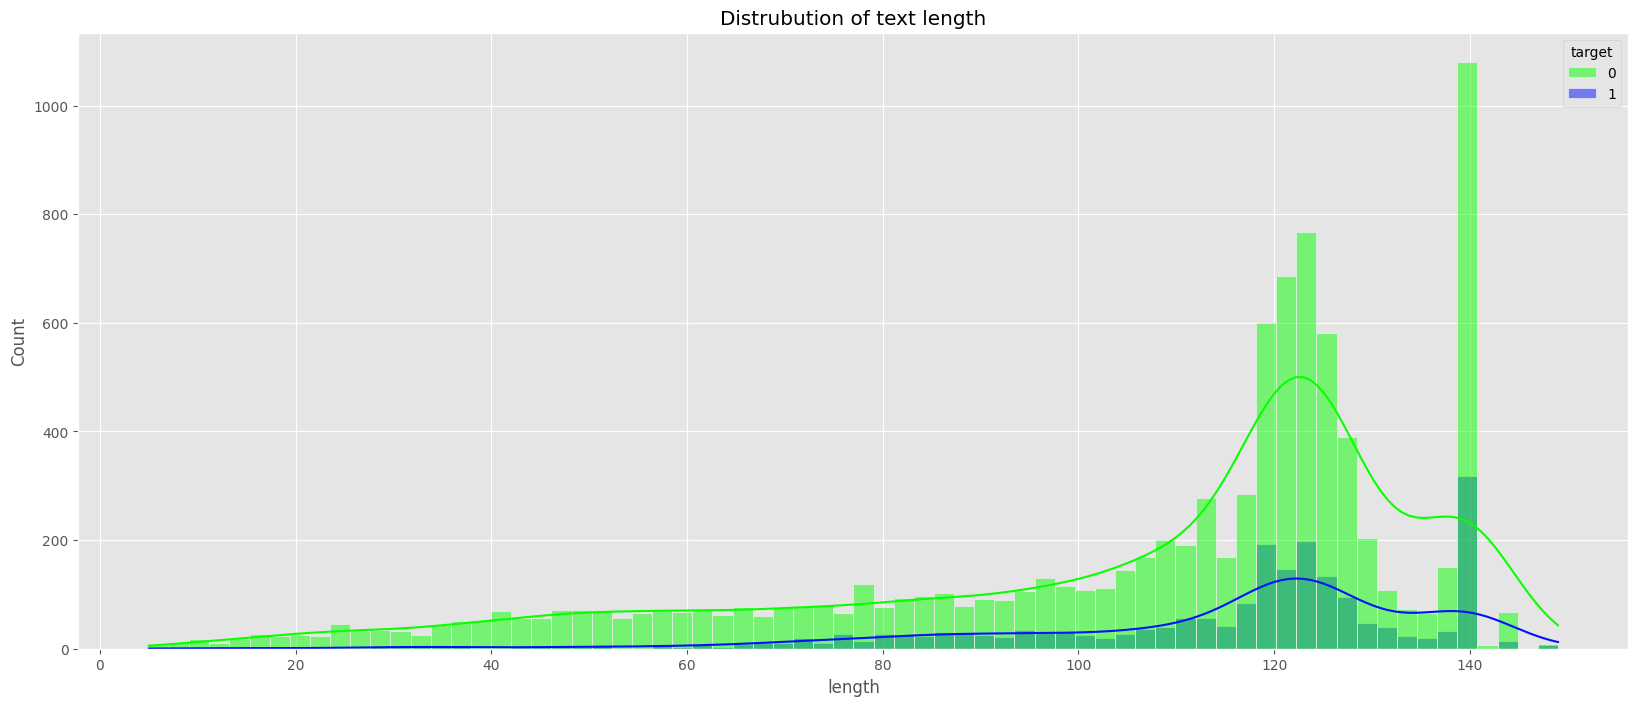

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(20,8))
sns.histplot(data=df,x='length',hue='target',palette='hsv',kde= True,bins=70)
plt.title('Distrubution of text length')
plt.show()
plt.tight_layout()

## Data Pre-Processing

In [19]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stemmer = PorterStemmer()

In [21]:
def preprocess_data(data):

    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data)

    #decontraction
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)

    #removal of html tags
    text = re.sub(r'<.*?>',' ',text)

    # Match all digits in the string and replace them by empty string
    text = re.sub(r'[0-9]', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)

    # filtering out miscellaneous text.
    text = re.sub('[^a-zA-Z]',' ',text)
    text = re.sub(r"\([^()]*\)", "", text)

    # remove mentions
    text = re.sub('@\S+', '', text)

    # remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)


    # Lowering all the words in text
    text = text.lower()
    text = text.split()

    text = [stemmer.stem(words) for words in text if words not in stopwords.words('english')]

    # Removal of words with length<2
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [22]:
# Apply the preprocess_data function to the text column
df['preprocess_data'] = df['text'].apply(preprocess_data)

# Show the first few cleaned tweets to verify
print(df[['text', 'preprocess_data']].head())

                                                text  \
0  Communal violence in Bhainsa, Telangana. "Ston...   
1  Telangana: Section 144 has been imposed in Bha...   
2  Arsonist sets cars ablaze at dealership https:...   
3  Arsonist sets cars ablaze at dealership https:...   
4  "Lord Jesus, your love brings freedom and pard...   

                                     preprocess_data  
0  commun violenc bhainsa telangana stone pelt mu...  
1  telangana section impos bhainsa januari clash ...  
2                  arsonist set car ablaz dealership  
3                  arsonist set car ablaz dealership  
4  lord jesu love bring freedom pardon fill holi ...  


In [23]:
# Tokenize the cleaned text
df['tokens'] = df['preprocess_data'].apply(word_tokenize)
print(df[['preprocess_data', 'tokens']].head())


                                     preprocess_data  \
0  commun violenc bhainsa telangana stone pelt mu...   
1  telangana section impos bhainsa januari clash ...   
2                  arsonist set car ablaz dealership   
3                  arsonist set car ablaz dealership   
4  lord jesu love bring freedom pardon fill holi ...   

                                              tokens  
0  [commun, violenc, bhainsa, telangana, stone, p...  
1  [telangana, section, impos, bhainsa, januari, ...  
2            [arsonist, set, car, ablaz, dealership]  
3            [arsonist, set, car, ablaz, dealership]  
4  [lord, jesu, love, bring, freedom, pardon, fil...  


##Data Exploration of Dataset - 2

In [24]:
df2 = pd.read_csv('/content/drive/MyDrive/Natural Language Processing with Disaster Tweets/train.csv')

In [25]:
df2.shape

(7613, 5)

In [26]:
df2.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [27]:
df2.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [28]:
df2.dtypes

,0
id,int64
keyword,object
location,object
text,object
target,int64


In [29]:
df2.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [30]:
df2.nunique()

,0
id,7613
keyword,221
location,3341
text,7503
target,2


In [31]:
df2.isna().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [32]:
df2.loc[df2.duplicated()]

,id,keyword,location,text,target


In [33]:
df2.loc[df2.duplicated(subset=['text'])].head(5)

,id,keyword,location,text,target
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0


In [34]:
df2['target'].value_counts()

,count
target,
0,4342
1,3271


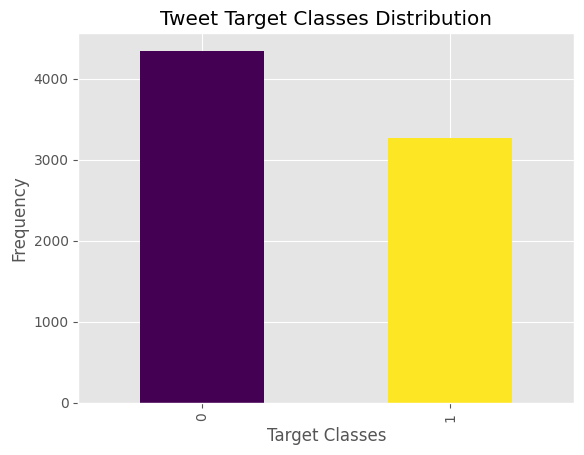

In [35]:
value_counts = df2['target'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(value_counts)))
value_counts.plot(kind='bar', color=colors)

plt.xlabel('Target Classes')
plt.ylabel('Frequency')
plt.title('Tweet Target Classes Distribution')
plt.show()

<ipython-input-36-3d7592fdf262>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10).colors


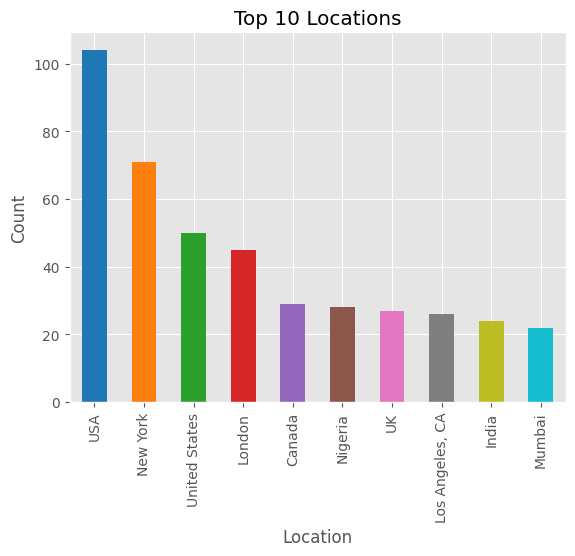

In [36]:
colors = plt.cm.get_cmap('tab10', 10).colors
ax = df2['location'].value_counts() \
    .head(10) \
    .plot(kind='bar', color=colors, title='Top 10 Locations')

ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.show()

<ipython-input-37-fa419c099d38>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 10).colors


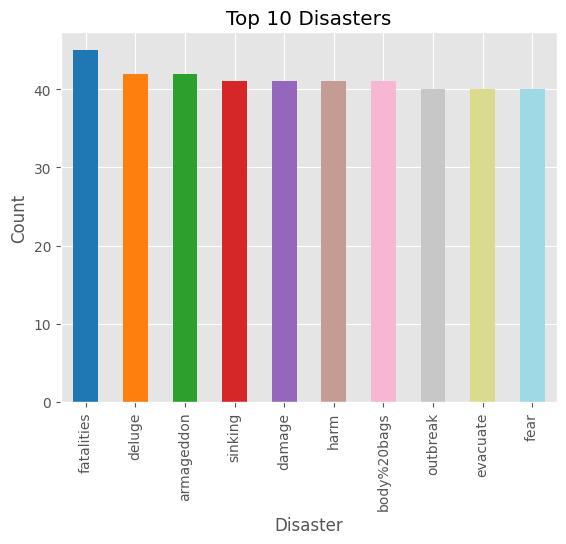

In [37]:
colors = plt.cm.get_cmap('tab20', 10).colors
ax = df2['keyword'].value_counts() \
    .head(10) \
    .plot(kind='bar', color=colors, title='Top 10 Disasters')

ax.set_xlabel('Disaster')
ax.set_ylabel('Count')
plt.show()

In [38]:
x = df2['location'].value_counts().head(200).to_frame().T
x

location,USA,New York,United States,London,Canada,Nigeria,UK,"Los Angeles, CA",India,Mumbai,"Washington, DC",Kenya,Worldwide,Australia,"Chicago, IL",California,Everywhere,"New York, NY","California, USA",Florida,San Francisco,United Kingdom,Los Angeles,Indonesia,"Washington, D.C.",Toronto,NYC,Ireland,Seattle,Earth,"San Francisco, CA",Chicago,Texas,"London, England","Sacramento, CA",New York City,"London, UK","Atlanta, GA",ss,"Dallas, TX","San Diego, CA",US,"Denver, Colorado",Manchester,304,World,"Nashville, TN",South Africa,Scotland,"Houston, TX","Denver, CO",Tennessee,"Seattle, WA",Sydney,"Austin, TX",worldwide,"Memphis, TN","Pennsylvania, USA",Massachusetts,"Morioh, Japan","Portland, OR","Oklahoma City, OK",Planet Earth,Global,"California, United States",Colorado,"Orlando, FL",Atlanta,"Charlotte, NC","Paterson, New Jersey",??????,"Brooklyn, NY",Road to the Billionaires Club,Singapore,Pedophile hunting ground,"Calgary, Alberta",WorldWide,in the Word of God,"Texas, USA",NY,Brasil,Philippines,"San Jose, CA",Wisconsin,"Boston, MA",Southern California,"Florida, USA","Cleveland, OH",Coventry,Indiana,New Jersey,"Leeds, England",Pakistan,Puerto Rico,"Vancouver, BC",New Hampshire,Pennsylvania,"Lagos, Nigeria","Asheville, NC",North Carolina,"New York, USA","Calgary, AB",Newcastle,"Melbourne, Australia","Tampa, FL",Lagos,The Netherlands,?????,San Francisco Bay Area,Sacramento,london,Oregon,Switzerland,"British Columbia, Canada",Jakarta/Kuala Lumpur/S'pore,"Mumbai, Maharashtra",Michigan,Japan,Tokyo,Maryland,Calgary,Paignton,Kansas City,Happily Married with 2 kids,"Portland, Oregon",Barbados,"Haddonfield, NJ","Philadelphia, PA",Edinburgh,Atlanta Georgia,?,Melbourne,canada,Geneva,U.S.A,"Port Harcourt, Nigeria",MAD as Hell,"Sydney, New South Wales",china,"Bend, Oregon",Midwest,Nigeria,Nairobi-KENYA,Leicester,Birmingham,"North Carolina, USA","Seattle, Washington","Las Vegas, Nevada","Oakland, CA","Sydney, Australia","Manchester, England",Cape Town,??,"Massachusetts, USA",Jamaica,Republic of Texas,"Phoenix, AZ",india,China,iTunes,"Adelaide, Australia",Germany,uk,Rio de Janeiro,"Columbus, OH",Gotham City,Memphis,"State College, PA",Sweden,"Tulsa, Oklahoma","Toronto, Ontario",Italy,Virginia,"Baltimore, MD","Illinois, USA","Raleigh, NC","Manhattan, NY",new york,"Nottingham, England",Buy Give Me My Money,Hong Kong,"Victoria, British Columbia",Taylor Swift,"South, USA",Washington DC,"Haysville, KS",Utah,Anonymous,Washington D.C.,World Wide,Nairobi,Naperville,London UK,Narnia,Asia,"Buffalo, NY","New Orleans ,Louisiana","Winston-Salem, NC",Malaysia,"Los Angeles, California"
count,104,71,50,45,29,28,27,26,24,22,21,20,19,18,18,17,15,15,15,14,14,14,13,13,13,12,12,12,11,11,11,11,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,8,8,8,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [39]:
df2['length'] = df2['text'].apply(len)

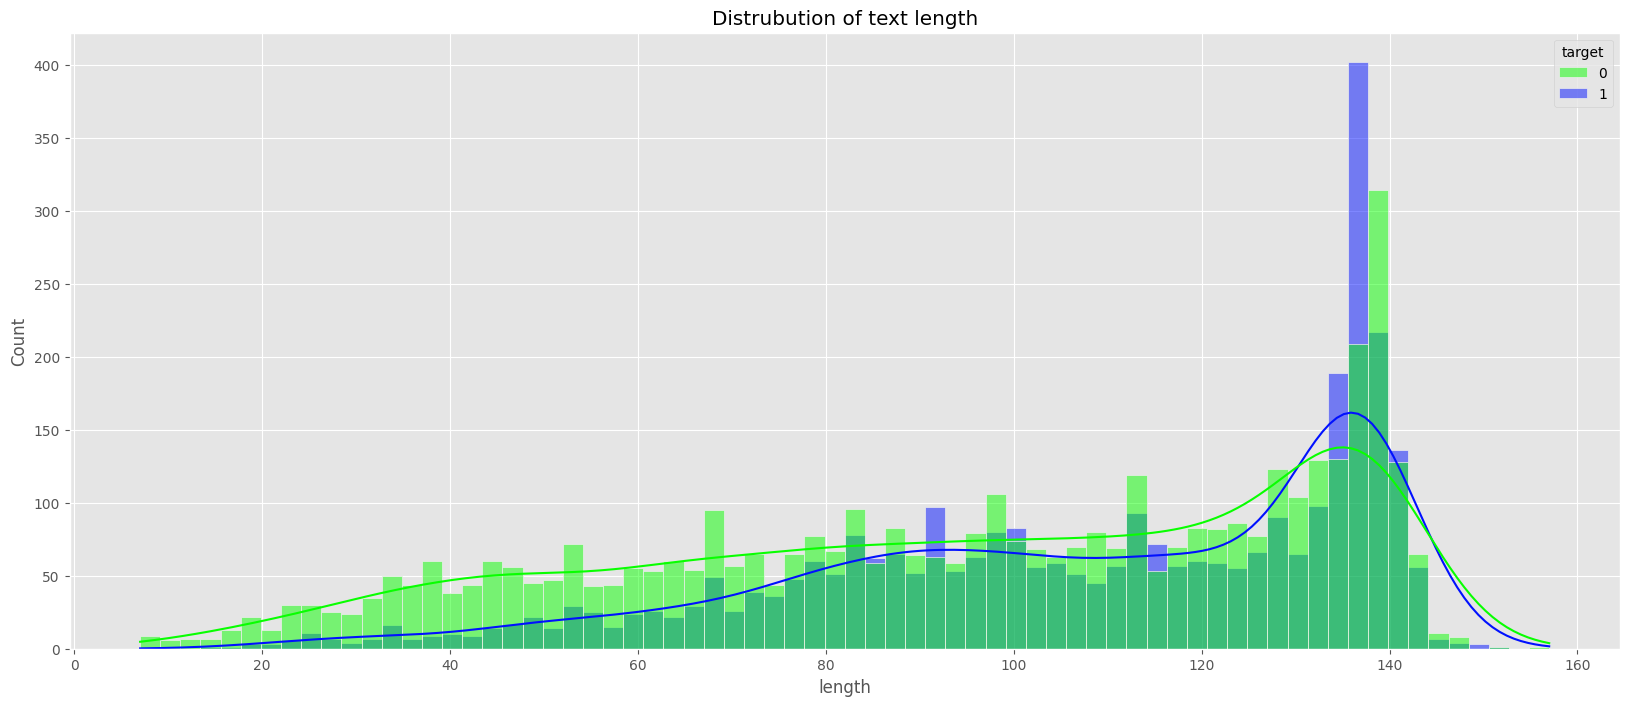

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(20,8))
sns.histplot(data=df2,x='length',hue='target',palette='hsv',kde= True,bins=70)
plt.title('Distrubution of text length')
plt.show()
plt.tight_layout()